Initial State


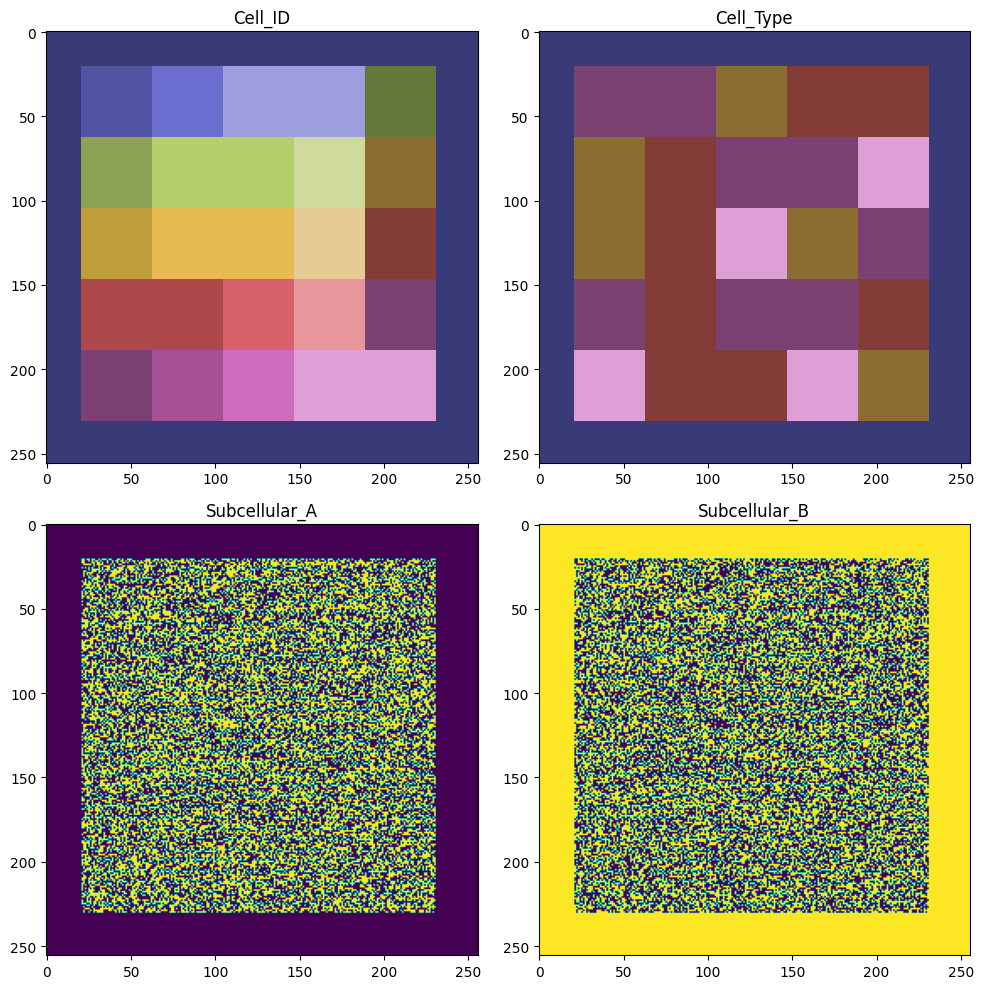

  0%|          | 1/500 [05:35<46:30:21, 335.51s/it]


In [ ]:
import torch
from multiomicscellsim.torch_cpm.config import TorchCPMConfig, TorchCPMCellType
from multiomicscellsim.patterns.config import RDPatternLibrary
from multiomicscellsim.torch_cpm.simulation import TorchCPM

import matplotlib.pyplot as plt

size = 256

adhesion_matrix = torch.tensor([[ 0.0, 1.0, 4.0, 5.0],
                                [ 1.0, 0.0, 1.0, 1.0],
                                [ 2.0, 1.0, 0.0, 1.0],
                                [ 5.0, 1.0, 1.0, 0.0]])
                                 
# Define some cell types

cell_types = [
    TorchCPMCellType(id=1,
                     name="A",
                     background_adhesion=10.0,
                     cells_adhesion=adhesion_matrix[0],
                     preferred_volume=int(0.4*size**2),
                     preferred_local_perimeter=4.0,
                     # RDPatternConfig contains f, k, D_a, D_b params)
                     subcellular_pattern=RDPatternLibrary.get_pattern_by_name('Worms'),
    ),
    TorchCPMCellType(id=2,
                     name="B",
                     background_adhesion=10.0,
                     cells_adhesion=adhesion_matrix[1],
                     preferred_volume=int(0.2*size**2),
                     preferred_local_perimeter=4.0,
                     subcellular_pattern=RDPatternLibrary.get_pattern_by_name('Worms'),
    ),
    TorchCPMCellType(id=3,
                     name="C",
                     background_adhesion=10.0,
                     cells_adhesion=adhesion_matrix[2],
                     preferred_volume=int(0.2*size**2),
                     preferred_local_perimeter=6.0,
                     subcellular_pattern=RDPatternLibrary.get_pattern_by_name('Worms'),
    ),
    TorchCPMCellType(id=4,
                     name="D",
                     background_adhesion=10.0,
                     cells_adhesion=adhesion_matrix[3],
                     preferred_volume=int(0.2*size**2),
                     preferred_local_perimeter=3.0,
                     subcellular_pattern=RDPatternLibrary.get_pattern_by_name('Worms'),
    )
]

# Define the global simulation parameters

cpm_config = TorchCPMConfig(
    size=size,
    frontier_probability=0.4,
    temperature=1.0,
    cell_types=cell_types,
    lambda_volume=10.0,
    lambda_perimeter=10.0,
    run_rd_every=2,
    rd_warmup_steps=1000,
    rd_steps=10,   
)

# Create the simulation object
cpm = TorchCPM(cpm_config)


# Setup an initial state
# Draw a 5x5 grid of cells using random cell types
for x in range(1, 6):
    for y in range(1, 6):
        cpm.draw_cell(x=size//6*x, 
                      y=size//6*y, 
                      cell_type=torch.randint(1, len(cell_types)+1, (1,)), 
                      size=size // 12)
print("Initial State")
cpm.plot_grid()
# FIXME: Something's going on with the pasting of the subcellular structures (see output)
simulation = cpm.yield_step(500)

In [44]:
steps = []

for s, step in enumerate(simulation):
    if s % 50 == 0:
        print(f"Step {s}")
        steps.append(step)
        

  0%|          | 1/500 [00:00<02:04,  4.00it/s]

Step 0


 10%|█         | 51/500 [00:07<01:08,  6.59it/s]

Step 50


 20%|██        | 101/500 [00:15<01:04,  6.15it/s]

Step 100


 24%|██▎       | 118/500 [00:18<00:59,  6.47it/s]


KeyboardInterrupt: 

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


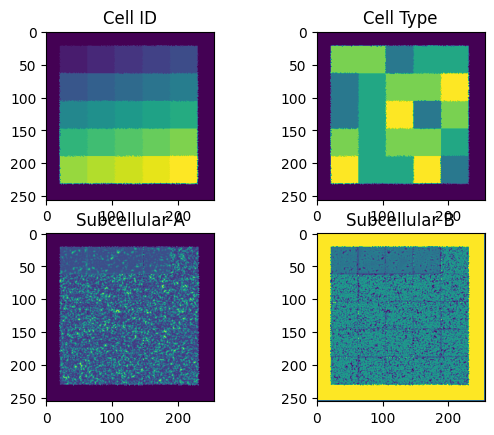

In [45]:
# Animate the simulation

from  matplotlib.animation import FuncAnimation
from IPython.display import HTML


# steps is a list of len(steps) elements, each element is a tuple (grid: torch.tensor [2, H, W], subcellular: torch.tensor [2, H, W])
# plotting an animation of the simulation as follows:
# first subplot: grid[0] (cell_id), second subplot: grid[1] (cell_type), third subplot: subcellular[0] (subcell_A), fourth subplot: subcellular[1] (subcell_B)

fig, axs = plt.subplots(2, 2)

def update(frame):
    for i, ax in enumerate(axs.flatten()):
        ax.clear()
        if i == 0:
            ax.imshow(steps[frame][0][0], cmap='viridis')
            ax.set_title('Cell ID')
        elif i == 1:
            ax.imshow(steps[frame][0][1], cmap='viridis')
            ax.set_title('Cell Type')
        elif i == 2:
            ax.imshow(steps[frame][1][0], cmap='viridis', vmin=0, vmax=1)
            ax.set_title('Subcellular A')
        elif i == 3:
            ax.imshow(steps[frame][1][1], cmap='viridis', vmin=0, vmax=1)
            ax.set_title('Subcellular B')

ani = FuncAnimation(fig, update, frames=len(steps), repeat=False)
HTML(ani.to_jshtml())


In [ ]:
import numpy as np
#np.save('debug.npy', steps)
steps = torch.tensor(np.load('debug.npy'))

In [2]:
import matplotlib.pyplot as plt

def plot_grids(grid, subgrid):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    axs[0].imshow(grid[0], cmap='viridis')
    axs[0].set_title('Cell ID')
    axs[1].imshow(grid[1], cmap='viridis')
    axs[1].set_title('Cell Type')
    axs[2].imshow(subgrid[0], cmap='viridis', vmin=0, vmax=1)
    axs[2].set_title('Subcellular A')
    axs[3].imshow(subgrid[1], cmap='viridis', vmin=0, vmax=1)
    axs[3].set_title('Subcellular B')
    plt.show()

def plot(*tensors):
    fig, axs = plt.subplots(1, len(tensors), figsize=(20, 5), squeeze=False)
    for i, tensor in enumerate(tensors):
        axs[0][i].imshow(tensor, cmap='viridis')
    plt.show()
    

  0%|          | 1/500 [04:45<39:35:59, 285.69s/it]

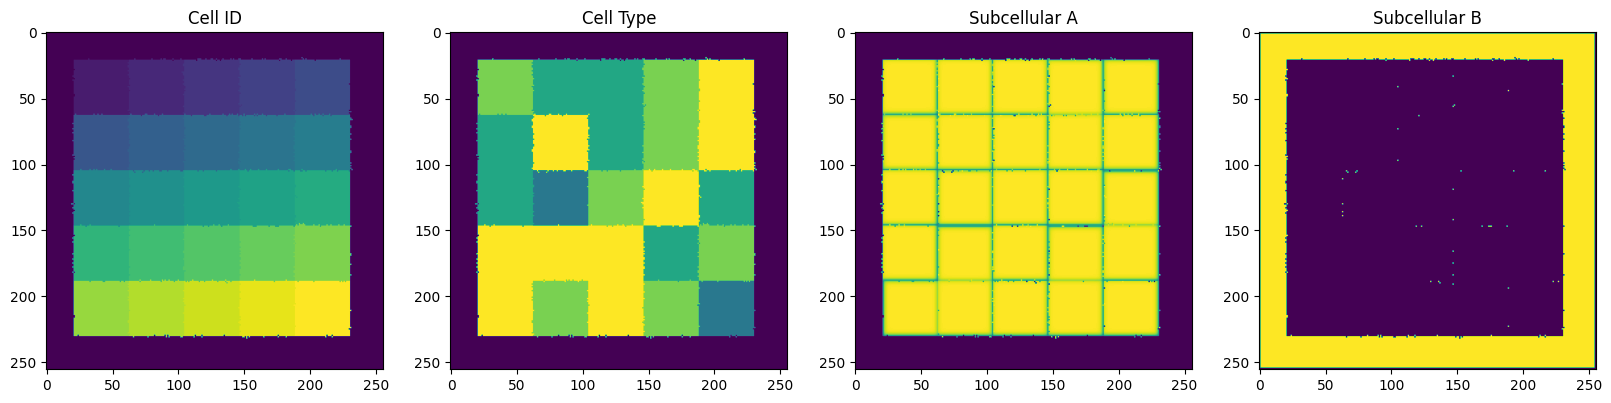

In [40]:
grid, subgrid = next(simulation)
plot_grids(grid, subgrid)

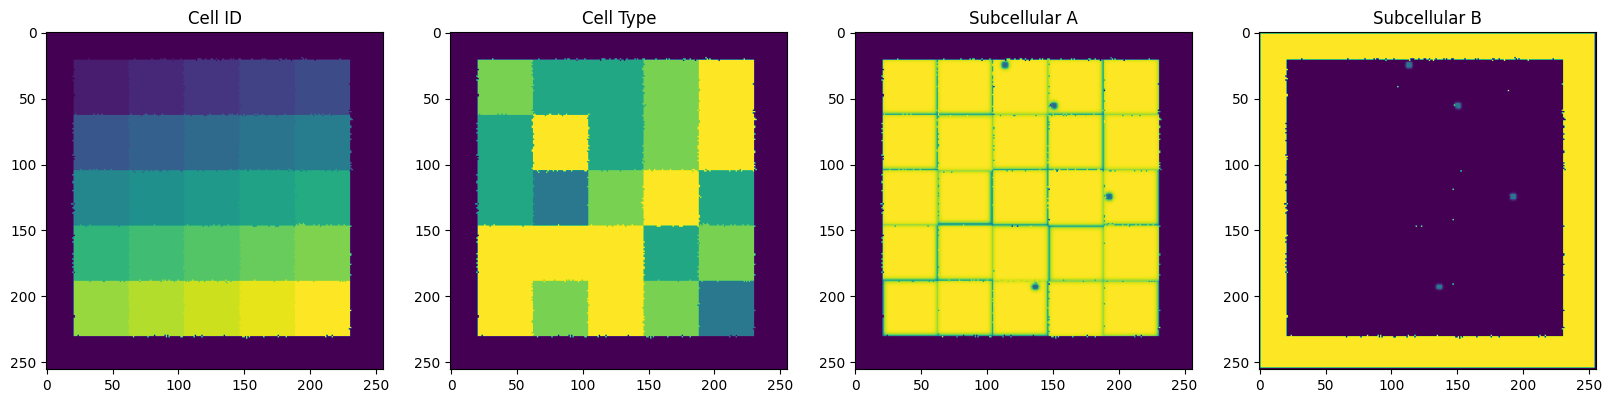

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [42]:
new_grid, new_subgrid = cpm.run_reaction_diffusion_on_cells(grid, subgrid, 10000)
plot_grids(new_grid, new_subgrid)
print(new_subgrid[0])

In [44]:
torch.clip((torch.randn(10, 10) + 0.5)/3, min=0.0, max=1.0).shape

torch.Size([10, 10])